In [10]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
DATA_PATH = '../data/ArchiveII_pp/'

In [11]:
!ls $DATA_PATH

test_0.csv	  train_0.csv	     valid_0.csv
test_srp_pp.csv   train_srp_pp.csv   valid_srp_pp.csv
test_tRNA_pp.csv  train_tRNA_pp.csv  valid_tRNA_pp.csv


In [12]:
te0 = 'test_0'	 
tr0 = 'train_0'	     
v0 = 'valid_0'
te0_srp = 'test_srp_pp'
tr0_srp = 'train_srp_pp'  
v0_srp = 'valid_srp_pp'
te0_tRNA = 'test_tRNA_pp' 
tr0_tRNA = 'train_tRNA_pp'  
v0_tRNA = 'valid_tRNA_pp'

In [14]:
l = os.listdir(DATA_PATH)
dfs = {}
for file in l:
    dfs[file] = pd.read_csv(DATA_PATH + file, index_col=0)
    dfs[file]['file'] = file.split('.')[0]
df = pd.concat([d for d in dfs.values()])
df.sample(3)

,sequence,structure,base_pairs,len,fam,pseudo_probe,file,id,motifs,stem
5s_T_cruziE,AGAGUACGACCAUACUUGAGUGAAUACACCAUAUCCCGUCCGAUUU...,.(((((((.(....((((.(((.....((((((............)...,"[[2, 119], [3, 118], [4, 117], [5, 116], [6, 1...",121,5s,"[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, ...",train_srp_pp,NaN,NaN,NaN
srp_Arth.aure._CP000474,CAGCCUCCACGCGGCGCUAUGUCACCCAACUCCCCCAGGGCAGGAA...,.((.((((((((..((.((.(((((......(((.....(((.......,"[[2, 87], [3, 86], [5, 84], [6, 83], [7, 82], ...",92,srp,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...",test_srp_pp,NaN,NaN,NaN
5s_Artemia-sp.-4,ACCAACGGCCAUACCACGUUGAAAGUACCCAGUCUCGUCAGAUCCU...,.((((((((....((((((((.....((((((............))...,"[[2, 117], [3, 116], [4, 115], [5, 114], [6, 1...",120,5s,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...",train_srp_pp,NaN,NaN,NaN


In [15]:
def avg_pp(seq):
    numeric_seq = []
    for x in seq:
        try:
            numeric_seq.append(float(x))
        except ValueError:
            continue
    return sum(numeric_seq) / len(numeric_seq) if numeric_seq else None


df['avg_pp'] = df['pseudo_probe'].apply(avg_pp)

<Axes: title={'center': 'Media de los promedios de pp por archivo'}, ylabel='file'>

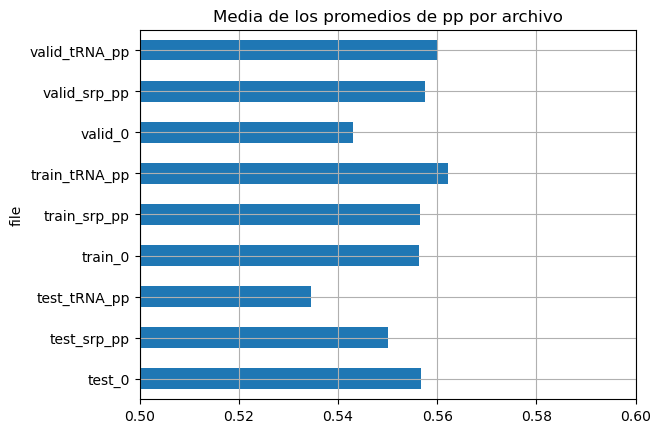

In [16]:
df.sort_values(by='file').groupby('file')['avg_pp'].mean().plot(kind='barh', grid= True, title='Media de los promedios de pp por archivo', xlim=[0.5,0.6])

In [17]:
df_0 = df[df['file'].str.contains('_0')]
df_srp = df[df['file'].str.contains('srp')]
df_tRNA= df[df['file'].str.contains('tRNA')]

Text(0.5, 1.0, 'Histograma de valor medio de pp')

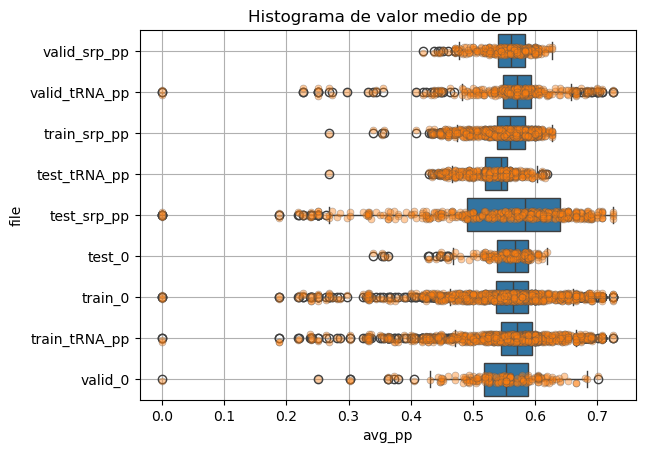

In [29]:

f = sns.boxplot(data=df, x='avg_pp', y='file')
g = sns.stripplot(data=df, x='avg_pp', y='file', legend=False,
        alpha=0.4, dodge=True, marker="o", edgecolor="auto", linewidth=0.5    )
g.grid()
f.set_title('Histograma de valor medio de pp')

In [27]:
df.query("avg_pp == 0")

,sequence,structure,base_pairs,len,fam,pseudo_probe,file,id,motifs,stem,avg_pp
srp_Schi.pomb._AU010514,AAACAAUGCACAUCACUACCGGGUCUUGGGCAGUGCGAUAGCGAUG...,.................................................,[],95,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",valid_tRNA_pp,NaN,NaN,NaN,0.0
srp_Leis.aeth._AY722730,UGGACCAGCGAGGGUGAUUUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",valid_tRNA_pp,NaN,NaN,NaN,0.0
srp_Crit.fasc._AY781797,UGGACCAGCGAGGGUGUUCUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test_srp_pp,NaN,NaN,NaN,0.0
srp_Crit.luci._AY781798,UGGACCAGCGAGGGUGUUCUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test_srp_pp,NaN,NaN,NaN,0.0
srp_Leis.aeth._AY722730,UGGACCAGCGAGGGUGAUUUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test_srp_pp,NaN,NaN,NaN,0.0
srp_Schi.pomb._AU010514,AAACAAUGCACAUCACUACCGGGUCUUGGGCAGUGCGAUAGCGAUG...,.................................................,[],95,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test_srp_pp,NaN,NaN,NaN,0.0
1560,UGGACCAGCGAGGGUGUUCUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train_0,srp_Crit.fasc._AY781797,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
2395,UGGACCAGCGAGGGUGUUCUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train_0,srp_Crit.luci._AY781798,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
10010,UGGACCAGCGAGGGUGAUUUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train_0,srp_Leis.aeth._AY722730,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
srp_Crit.fasc._AY781797,UGGACCAGCGAGGGUGUUCUGCUGCGUUGACGUGGUGCUCUGCUUG...,.................................................,[],58,srp,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train_tRNA_pp,NaN,NaN,NaN,0.0


Text(0.5, 1.0, 'Histograma de valor medio de pp')

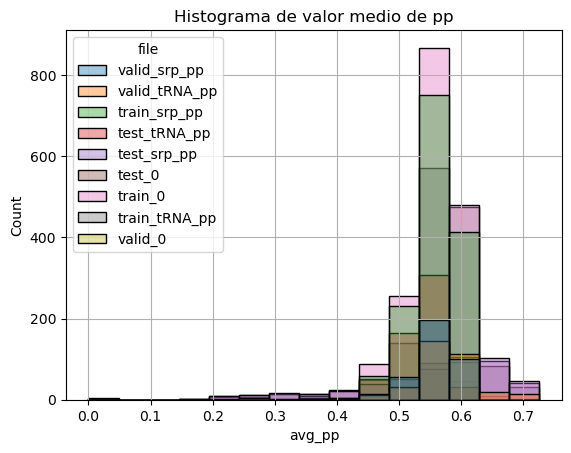

In [63]:
f = sns.histplot(data=df, x='avg_pp', hue='file', bins=15, alpha=0.4)
f.grid()
f.set_title('Histograma de valor medio de pp')

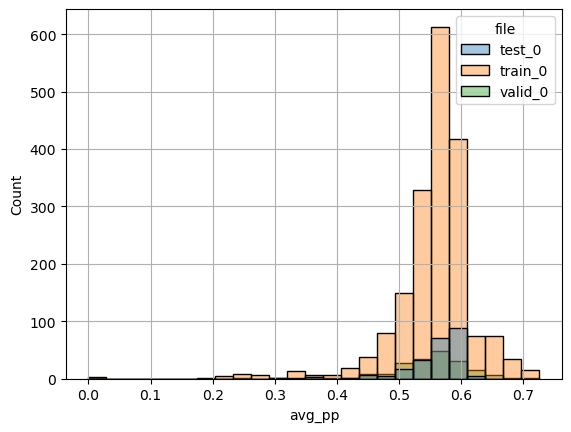

In [55]:
f = sns.histplot(data=df_0, x='avg_pp', hue='file', bins=25, alpha=0.4)
f.grid()

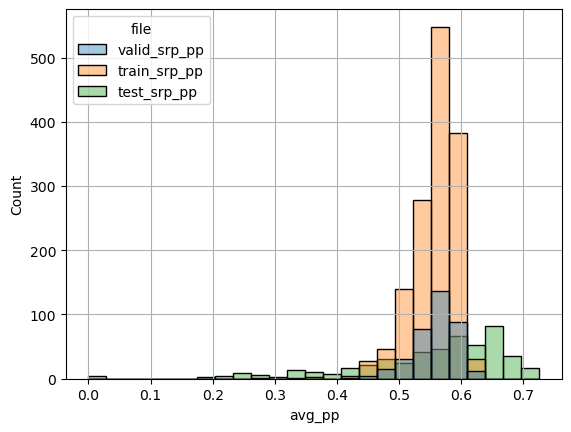

In [57]:
f = sns.histplot(data=df_srp, x='avg_pp', hue='file', bins=25, alpha=0.4)
f.grid()

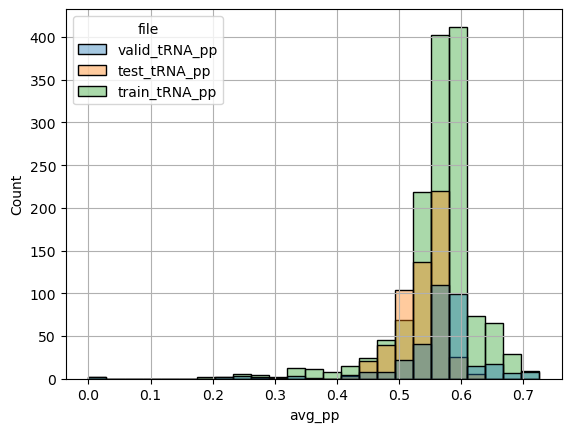

In [58]:
f = sns.histplot(data=df_tRNA, x='avg_pp', hue='file', bins=25, alpha=0.4)
f.grid()

In [75]:
(0.4 + 0.666666 + 0.333333) / 3

0.4666663333333334